In [1]:
import torch
from torch import nn
from math import inf
from tqdm import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms import ToTensor

In [2]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder("datasets/tile_data/train",  transform = preprocess)
test_dataset = datasets.ImageFolder("datasets/tile_data/test",  transform = preprocess)

In [4]:
len(train_dataset), len(test_dataset)

(1000, 600)

In [5]:
train_dataset.class_to_idx

{'Negative': 0, 'Positive': 1}

In [6]:
train_dataset_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
model = nn.Sequential(
    nn.Conv2d(3, 3, kernel_size=(3, 3), padding=1, padding_mode="reflect"), 
    nn.BatchNorm2d(3), 
    nn.ReLU(),
    nn.MaxPool2d(3, 3),
    nn.Conv2d(3, 6, kernel_size=(3, 3), padding=1, padding_mode="reflect"),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(3, 3),
    nn.Conv2d(6, 12, kernel_size=(3, 3), padding=1, padding_mode="reflect"), 
    nn.BatchNorm2d(12),
    nn.Flatten(),
    nn.Linear(6912, 1024),
    nn.Dropout(0.2),
    nn.Linear(1024, 128),
    nn.Dropout(0.2),
    nn.Linear(128, 1)
)

In [8]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
model.to("cuda")

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (9): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=6912, out_features=1024, bias=True)
  (12): Dropout(p=0.2, inplace=False)
  (13): Linear(in_features=1024, out_features=128, bias=True)
  (14): Dropout(p=0.2, inplace=False)
  (15): Linear(

In [10]:
early_stopping = 0
old_loss = inf
for i in range(100):
    print(f"[] Epochs: {i+1}")
    total_loss = 0
    model.train()
    for x, y in tqdm(train_dataset_loader):
        optimizer.zero_grad()
        outputs = model(x.to("cuda"))
        y = y.type(torch.float32)
        y = y.reshape((-1, 1)).to("cuda")
        loss = loss_fn(outputs, y)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    loss_value = total_loss
    if loss_value < old_loss:
        old_loss = loss_value
        early_stopping = 0
    else:
        early_stopping += 1
    if early_stopping > 2:
        print("Early stopping triggered")
        break
    print(total_loss)

[] Epochs: 1


100%|██████████████████████████████████| 16/16 [00:12<00:00,  1.25it/s]


5.909966558218002
[] Epochs: 2


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.46it/s]


3.4658194482326508
[] Epochs: 3


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.48it/s]


2.6145172342658043
[] Epochs: 4


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.45it/s]


2.302306406199932
[] Epochs: 5


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.48it/s]


1.9600529447197914
[] Epochs: 6


100%|██████████████████████████████████| 16/16 [00:12<00:00,  1.31it/s]


1.7177361138164997
[] Epochs: 7


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.47it/s]


1.5766368173062801
[] Epochs: 8


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.38it/s]


1.5182867906987667
[] Epochs: 9


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.47it/s]


1.301998257637024
[] Epochs: 10


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.56it/s]


1.3629046380519867
[] Epochs: 11


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.53it/s]


1.1303694695234299
[] Epochs: 12


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.55it/s]


1.1203833669424057
[] Epochs: 13


100%|██████████████████████████████████| 16/16 [00:13<00:00,  1.18it/s]


0.9406182989478111
[] Epochs: 14


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.45it/s]


0.8740099016577005
[] Epochs: 15


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.52it/s]


0.9177346099168062
[] Epochs: 16


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.51it/s]


0.7975917151197791
[] Epochs: 17


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.42it/s]


0.6249965177848935
[] Epochs: 18


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.51it/s]


0.7546790931373835
[] Epochs: 19


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.46it/s]


0.5751151759177446
[] Epochs: 20


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.36it/s]


0.6011580983176827
[] Epochs: 21


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.43it/s]


0.5242309663444757
[] Epochs: 22


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.38it/s]


0.4974241219460964
[] Epochs: 23


100%|██████████████████████████████████| 16/16 [00:12<00:00,  1.32it/s]


0.5411078091710806
[] Epochs: 24


100%|██████████████████████████████████| 16/16 [00:12<00:00,  1.25it/s]


0.3503729421645403
[] Epochs: 25


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.48it/s]


0.33806191571056843
[] Epochs: 26


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.52it/s]


0.36072617257013917
[] Epochs: 27


100%|██████████████████████████████████| 16/16 [00:10<00:00,  1.49it/s]


0.3339532916434109
[] Epochs: 28


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.41it/s]


0.3100667451508343
[] Epochs: 29


100%|██████████████████████████████████| 16/16 [00:11<00:00,  1.36it/s]


0.49451813753694296
[] Epochs: 30


100%|██████████████████████████████████| 16/16 [00:16<00:00,  1.02s/it]


0.19646752811968327
[] Epochs: 31


100%|██████████████████████████████████| 16/16 [00:19<00:00,  1.19s/it]


0.22433143807575107
[] Epochs: 32


100%|██████████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


0.21998467133380473
[] Epochs: 33


100%|██████████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

Early stopping triggered


In [11]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0    
    test_loss = 0
    for x, y in tqdm(test_dataset_loader):
        x = x.to("cuda")
        y = y.type(torch.float32)
        y = y.reshape((-1, 1)).to("cuda")    
        outputs = model(x)
        preds = torch.sigmoid(outputs) > 0.5  
        correct += (preds == y).sum().item()    
        loss = loss_fn(outputs, y)
        total += y.size(0)   
        test_loss += loss.item() * y.size(0)
    accuracy = correct / total
    loss = test_loss / total
    print(f"Accuracy: {accuracy}, Test loss: {loss}")

100%|██████████████████████████████████| 10/10 [00:09<00:00,  1.10it/s]

Accuracy: 0.9583333333333334, Test loss: 0.12716371739904087


## Testing

In [12]:
from PIL import Image

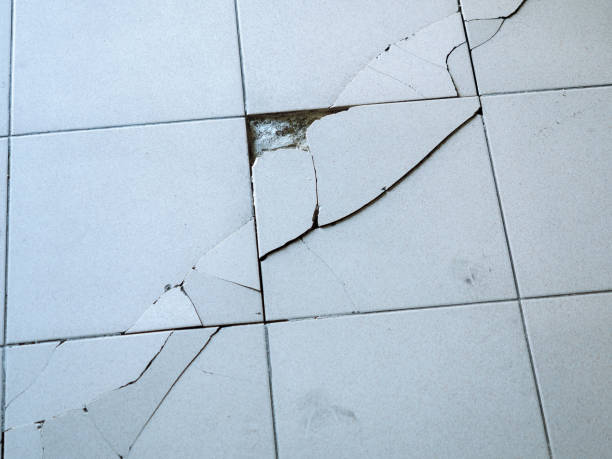

In [13]:
img = Image.open("test/tile.jpg")
img

In [14]:
img = preprocess(img)
img.shape

torch.Size([3, 224, 224])

In [15]:
img = img.unsqueeze(dim=0)
img.shape

torch.Size([1, 3, 224, 224])

In [16]:
model.eval()

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (9): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=6912, out_features=1024, bias=True)
  (12): Dropout(p=0.2, inplace=False)
  (13): Linear(in_features=1024, out_features=128, bias=True)
  (14): Dropout(p=0.2, inplace=False)
  (15): Linear(

In [17]:
with torch.no_grad():
    outputs = torch.sigmoid(model(img.to('cuda')))[0]
    print(outputs.item())

0.9989883303642273
